Code Reference: Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition

# Classifying Images with Deep Convolutional Neural Networks (Part 1/2)

In [1]:
from IPython.display import Image

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
# 코랩에서 실행할 경우 이미지를 먼저 다운로드합니다
!wget https://git.io/JL5Ob -O example-image.png
!wget https://git.io/JL5Op -O example-image-gray.png

--2023-05-01 11:11:32--  https://git.io/JL5Ob
Resolving git.io (git.io)... 140.82.112.21
Connecting to git.io (git.io)|140.82.112.21|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image.png [following]
--2023-05-01 11:11:33--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch15/example-image.png
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image.png [following]
--2023-05-01 11:11:33--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch15/example-image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.1

In [4]:
img_raw = tf.io.read_file('example-image.png')
img = tf.image.decode_image(img_raw)
print('이미지 크기:', img.shape)
print('채널 개수:', img.shape[2])
print('이미지 데이터 타입:', img.dtype)
print(img[100:102, 100:102, :])

이미지 크기: (252, 221, 3)
채널 개수: 3
이미지 데이터 타입: <dtype: 'uint8'>
tf.Tensor(
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]], shape=(2, 2, 3), dtype=uint8)


In [5]:
img_raw = tf.io.read_file('example-image-gray.png')
img = tf.image.decode_image(img_raw)
tf.print('랭크:', tf.rank(img))
tf.print('크기:', img.shape)

랭크: 3
크기: TensorShape([252, 221, 1])


## Implementing a deep convolutional neural network using TensorFlow

### The multilayer CNN architecture

### Loading and preprocessing the data

In [6]:
import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt

In [7]:
## MNIST 데이터셋
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys(['test', 'train'])


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256
NUM_EPOCHS = 20

In [9]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

### Implementing a CNN using the TensorFlow Keras API

#### Configuring CNN layers in Keras

 * **Conv2D:** `tf.keras.layers.Conv2D`
   * `filters`
   * `kernel_size`
   * `strides`
   * `padding`
   
   
 * **MaxPool2D:** `tf.keras.layers.MaxPool2D`
   * `pool_size`
   * `strides`
   * `padding`
   
   
 * **Dropout** `tf.keras.layers.Dropout2D`
   * `rate`

#### Constructing a CNN in Keras

In [10]:
model = tf.keras.Sequential()

######################################################################
# TODO: LeNet 구조를 참고하여 모델을 완성 해 보세요.
# Dense(Linear) Layer는 이후 따로 추가되므로, CNN 부분만 추가 필요
# Hint: tf.keras.layers.Conv2D / tf.keras.layers.MaxPool2D 를 사용


model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))


######################################################################

In [11]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [12]:
model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [13]:
# CNN 이후 Dense Layer 추가

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [14]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
196/196 [==============================] - 17s 28ms/step - loss: 0.2251 - accuracy: 0.9306 - val_loss: 0.0601 - val_accuracy: 0.9809
Epoch 2/20
196/196 [==============================] - 4s 17ms/step - loss: 0.0555 - accuracy: 0.9829 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 3/20
196/196 [==============================] - 4s 17ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0375 - val_accuracy: 0.9882
Epoch 4/20
196/196 [==============================] - 5s 21ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0382 - val_accuracy: 0.9876
Epoch 5/20
196/196 [==============================] - 4s 17ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0342 - val_accuracy: 0.9897
Epoch 6/20
196/196 [==============================] - 4s 17ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 7/20
196/196 [==============================] - 5s 21ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0374 - val_accuracy: 0.989

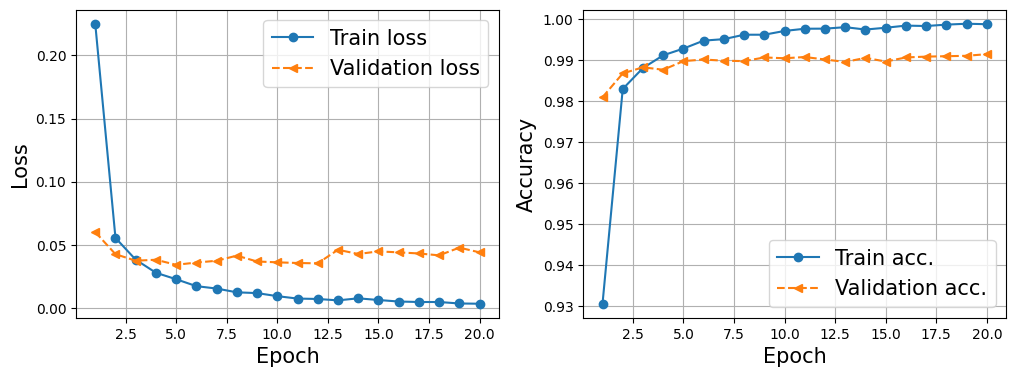

In [17]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.grid()
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.grid()

plt.show()

In [18]:
test_results = model.evaluate(mnist_test.batch(20))
print('\n테스트 정확도 {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 3s 5ms/step - loss: 0.0282 - accuracy: 0.9935

테스트 정확도 99.35%


TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


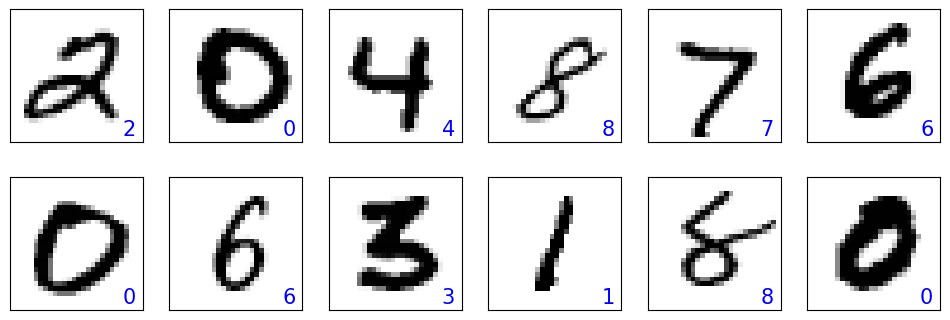

In [19]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
plt.show()

In [20]:
# Training 완료 된 모델을 저장

import os

if not os.path.exists('models'):
    os.mkdir('models')


model.save('models/mnist-cnn.h5')

In [21]:
# Loading from the saved ckeckpoint

model_saved = tf.keras.models.clone_model(
    model, input_tensors=None
)

In [23]:
##################################################
# TODO: 저장 된 Model을 불러오고, 성공적으로 불러와 졌는지 성능을 확인 해 보세요.

model_saved.load_weights('models/mnist-cnn.h5')

model_saved.compile(metrics=['accuracy'])

##################################################

test_results2 = model_saved.evaluate(mnist_test.batch(20))
print('\n테스트 정확도 (Original) {:.2f}%'.format(test_results[1]*100))
print('\n테스트 정확도 (Loaded) {:.2f}%'.format(test_results2[1]*100))

500/500 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.9935

테스트 정확도 (Original) 99.35%

테스트 정확도 (Loaded) 99.35%


In [24]:
model_new = tf.keras.Sequential()

##################################################
# TODO: 새로운 모델을 정의하고 훈련하여 성능을 비교 해 보세요.

model_new.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model_new.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model_new.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model_new.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model_new.add(tf.keras.layers.Flatten())

model_new.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model_new.add(tf.keras.layers.Dropout(
    rate=0.5))

##################################################
    
model_new.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

model_new.build(input_shape=(None, 28, 28, 1))

In [ ]:
model_new.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history_new = model_new.fit(mnist_train, epochs=NUM_EPOCHS, 
                            validation_data=mnist_valid, 
                            shuffle=True)

In [ ]:
test_results_new = model_new.evaluate(mnist_test.batch(20))
print('\n테스트 정확도 (Original) {:.2f}%'.format(test_results[1]*100))
print('\n테스트 정확도 (New) {:.2f}%'.format(test_results_new[1]*100))

In [ ]:
hist_new = history_new.history
x_arr = np.arange(len(hist_new['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss (Original)')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss (Original)')
ax.plot(x_arr, hist_new['loss'], '-o', label='Train loss (New)')
ax.plot(x_arr, hist_new['val_loss'], '--<', label='Validation loss (New)')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.grid()
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc. (Original)')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc. (Original)')
ax.plot(x_arr, hist_new['accuracy'], '-o', label='Train acc. (New)')
ax.plot(x_arr, hist_new['val_accuracy'], '--<', label='Validation acc. (New)')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.grid()

plt.show()